---

## MIT808 Modeling - Topic Analysis (LDA)






In [1]:
#To check GPU available. If you have a GPU available, the output will show the name of your GPU device. If no GPU is available, the output will show an empty string.

import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
# Shorthand for import numpy and import matplotlib.pyplot, which are two popular libraries used for numerical computing and data visualization, respectively. By using %pylab, you can import these libraries in one line of code.
# inline is an optional argument that tells matplotlib to display plots inline in the Jupyter Notebook, rather than in a separate window.

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import locale

# Set the locale to use UTF-8 encoding
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [4]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


In [5]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [6]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import string
from sklearn.metrics.pairwise import cosine_similarity

import gensim.downloader as api
import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import preprocess_string
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf as NMFModel

from pprint import pprint

import spacy

import pickle
import re

import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt

nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Notebook steps

Modelling Approach:

1. Import the dataset (for Colab, from Google Drive | for Jupyterlab local drive)

    [1.1] Specification of dataset column to be modelled and remove empty rows

    [1.2] Global variables

2. LDA topic modeling with Gensim package

    [2.1] Preprocessing

    [2.2] Without lemmatizing & With lemmatizing

    [2.3] Coherence analysis

3. NMF topic modeling with Gensim package

    [3.1] With lemmatizing

    [3.2] Coherence analysis
    
4. Topic Visualization

    [4.1] K-Means Clustering

    [4.2] PylDavis


**1. Importing the dataset**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

# Read CSV file
df = pd.read_csv('/content/drive/MyDrive/University Pretoria/MIT808/Data/Output2.csv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [9]:
# Magic command is used to enable the automatic timing of each cell in Jupyter notebooks. 
# Once it is activated, the time it takes to run each cell is displayed in the output area of the cell. 
# This can be useful for profiling code and identifying performance bottlenecks.
# Only usable in Jupyterlab though

#%load_ext autotime

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Python library that allows you to add progress bars to your loops, making it easier to track the progress of long-running operations. 
# It provides a simple way to add progress bars to for loops, while loops, and other iterators in Python. 
# The library provides a variety of options for customizing the progress bar's appearance, such as setting the progress bar's length, adding a description, and more. 
# The library is useful for a wide range of applications, including data processing, machine learning, and scientific computing.Only 
# Only usable in Jupyterlab

#pip install tqdm

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.1. Specification of dataset column to be modelled and remove empty rows

In [11]:
df = df['abstract']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Check if there are any empty rows

row_n = len(df)

# Create a boolean mask indicating which cells contain missing values
mask = df.isna()

# Count the number of True values in the mask for each row
num_empty_rows = mask.sum()

# Print the result
print("Number of empty rows: ", num_empty_rows)
print("Total rows: ", row_n)

Number of empty rows:  1418
Total rows:  159846


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df.dropna(inplace=True)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
row_n = len(df)
print("Total rows: ", row_n)

Total rows:  158428


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
documents = df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
documents.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    Changes in the ‘ecology of languages’ after th...
1    The occurrence of low night temperatures durin...
2    Nitrogen is a crucial input for the efficient ...
3    The Murrumbidgee Irrigation Area (MIA), the Co...
4    It has become central to Occidental self-under...
Name: abstract, dtype: object

1.2. Global Variables

In [17]:
# Number of words to be selected per topic
num_top_words= 20

# Number of topics to be selected
n_components = 20

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**2.LDA topic modeling with Gensim package**

**Tokenization**

The tokenization process involves breaking down the text into individual words, or tokens, using a default regular expression pattern to split the text into tokens. The tokens are then normalized by converting them to lowercase and removing punctuation and non-alphabetic characters. By default, TfidfVectorizer uses its built-in tokenizer, which splits the text into words based on whitespace and punctuation. However, if you want to use a custom tokenizer, you can pass your tokenizer function to the tokenizer parameter of the TfidfVectorizer constructor.

**Stemming and Lemmatizing**

Stemming can be a useful preprocessing step for topic modeling if you want to reduce the vocabulary size and improve the performance of the model by grouping together words with similar meanings.

By stemming the words, you can reduce them to their base form, which can help to reduce the number of unique words in the vocabulary and group together words that have the same root or stem. For example, the words "running", "runner", and "run" would all be reduced to the stem "run", which can help to capture the common theme of the words in the topic model.

However, stemming may not always be necessary or appropriate for topic modeling, depending on the specific use case and data. It's always a good idea to experiment with different preprocessing techniques and evaluate their impact on the performance of the model.

In summary, stemming can be a useful preprocessing step for topic modeling, but it is not always necessary or appropriate for every use case.

Both lemmatizing and stemming can be useful for topic modeling, but the choice between them depends on the specific use case and the data being analyzed. If accuracy is the primary concern, lemmatizing may be a better choice, while if efficiency is the primary concern, stemming may be more appropriate. It is always a good idea to experiment with different preprocessing techniques and evaluate their impact on the performance of the model.

#### Stemmer and a lemmatizer function

In [18]:
# Define a custom tokenizer function that applies stemming using PorterStemmer
stemmer = PorterStemmer()

def tokenizer_with_stemming(text):
    tokens = text.split()
    stems = [stemmer.stem(token) for token in tokens]
    return stems

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a custom tokenizer function that applies both tokenization and lemmatization
def tokenizer_and_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.1. LDA without and with a lemmatiser

In [19]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
pip install -U scikit-learn

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#Define preprocessing steps 

stop_words = set(stopwords.words('english'))

#For TFIDVEctorizer
def preprocess_v(text):
    # remove HTML tags and URLs
    text = re.sub('<[^>]+>', '', text)
    text = re.sub(r'http\S+', '', text)
    # remove punctuation and convert to lowercase
    text = re.sub('[^a-zA-Z0-9]', ' ', text.lower())
    # remove numericals and numbers
    text = re.sub(r'\b\d+\b', '', text)
    # tokenize the text into words
    words = text.split()
    # lemmatize words and remove stop words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # replace "important" with "crucial"
    #text = text.replace('important', 'crucial')
    # join the words to form a string
    # Remove distracting single quotes
    text = re.sub("\'", "", text)
    # remove Emails
    text = re.sub('\S*@\S*\s?', '', text)
    text = ' '.join(words)
    return text

#For Gensim without lemmatizing
def preprocess_w(text):
    # remove HTML tags and URLs
    text = re.sub('<[^>]+>', '', text)
    text = re.sub(r'http\S+', '', text)
    # remove punctuation and convert to lowercase
    text = re.sub('[^a-zA-Z0-9]', ' ', text.lower())
    # remove numericals and numbers
    text = re.sub(r'\b\d+\b', '', text)
    # tokenize the text into words
    words = text.split()
    # lemmatize words and remove stop words
    # words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # replace "important" with "crucial"
    #text = text.replace('important', 'crucial')
    text = re.sub("\'", "", text)
    # remove Emails
    text = re.sub('\S*@\S*\s?', '', text)
    return words

    #For Gensim with lemmatizing
def preprocess(text):
    # remove HTML tags and URLs
    text = re.sub('<[^>]+>', '', text)
    text = re.sub(r'http\S+', '', text)
    # remove punctuation and convert to lowercase
    text = re.sub('[^a-zA-Z0-9]', ' ', text.lower())
    # remove numericals and numbers
    text = re.sub(r'\b\d+\b', '', text)
    # tokenize the text into words
    words = text.split()
    # lemmatize words and remove stop words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # replace "important" with "crucial"
    #text = text.replace('important', 'crucial')
    text = re.sub("\'", "", text)
    # remove Emails
    text = re.sub('\S*@\S*\s?', '', text)
    return words

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:24: DeprecationWarning: invalid escape sequence \S
<>:45: DeprecationWarning: invalid escape sequence \S
<>:65: DeprecationWarning: invalid escape sequence \S
<>:24: DeprecationWarning: invalid escape sequence \S
<>:45: DeprecationWarning: invalid escape sequence \S
<>:65: DeprecationWarning: invalid escape sequence \S
<ipython-input-21-19ea591d4a3a>:24: DeprecationWarning: invalid escape sequence \S
  text = re.sub('\S*@\S*\s?', '', text)
<ipython-input-21-19ea591d4a3a>:45: DeprecationWarning: invalid escape sequence \S
  text = re.sub('\S*@\S*\s?', '', text)
<ipython-input-21-19ea591d4a3a>:65: DeprecationWarning: invalid escape seque

In [22]:
doculist = documents.tolist()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
%%time

# Preprocessing without lemmatizing

documents_w = doculist
document_tokens_w = [preprocess_w(doc) for doc in documents_w]
document_tokens_w = [gensim.utils.simple_preprocess(' '.join(tokens)) for tokens in document_tokens_w]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1min 29s, sys: 7.18 s, total: 1min 36s
Wall time: 2min 13s


In [24]:
%%time

# Preprocessing with lemmatizing

documents = doculist
document_tokens = [preprocess(doc) for doc in documents]
document_tokens = [gensim.utils.simple_preprocess(' '.join(tokens)) for tokens in document_tokens]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 3min 2s, sys: 4.47 s, total: 3min 6s
Wall time: 3min 31s


In [25]:
#Test the output

print("First 5 documents:")
print(documents[:5])

print("\nFirst 5 document tokens:")
print(document_tokens_w[:5])

print("\nFirst 5 document tokens:")
print(document_tokens[:5])

First 5 documents:
['Changes in the ‘ecology of languages’ after the independence of Indonesia have resulted in changes in the social, cultural and economic settings. These changes in turn have affected the well-being of indigenous languages and cultures right across the Indonesian archipelago. This has particularly been the case in the last thirty years under the harsh campaign of Indonesianisation through the rhetoric of pembangunan (development) in the New Order era of Soeharto’s regime. Smaller indigenous languages such as Rongga, a minority language on the island of Flores, are particularly vulnerable.', 'The occurrence of low night temperatures during reproductive development is one of the factors most limiting rice yields in southern Australia. Yield losses due to cold temperature are the result of incomplete pollen formation and subsequent floret sterility. Researchers have found that in 75% of years, rice farmers suffer losses between 0.5 and 2.5 t/ha. Research is being undert

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Count the total number of preprocessed tokens

# Flatten the list of document tokens
all_tokens_w = [token for doc_tokens_w in document_tokens_w for token in doc_tokens_w]

# Count the number of document tokens
num_tokens_w = len(all_tokens_w)

# Flatten the list of document tokens
all_tokens = [token for doc_tokens in document_tokens for token in doc_tokens]

# Count the number of document tokens
num_tokens = len(all_tokens)

print(f"Number of document tokens: {num_tokens}")
print(f"Number of document tokens: {num_tokens_w}")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of document tokens: 17764842
Number of document tokens: 27821570


In [27]:
%%time

# Without lemmatizer

# Get the vocabulary of the vectorizer
vocabulary_w = set(token for doc in document_tokens_w for token in doc)

# Convert the documents to a list of token lists
docums_w = [[token for token in doc.split() if token in vocabulary_w] for doc in vocabulary_w]

dictionary_w = Dictionary(docums_w)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 13 s, sys: 76.7 ms, total: 13.1 s
Wall time: 13.2 s


In [28]:
%%time

# With lemmatizer

# Get the vocabulary of the vectorizer
vocabulary = set(token for doc in document_tokens for token in doc)

# Convert the documents to a list of token lists
docums = [[token for token in doc.split() if token in vocabulary] for doc in vocabulary]

dictionary = Dictionary(docums)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 6.08 s, sys: 61.3 ms, total: 6.14 s
Wall time: 6.27 s


In [29]:
# Print the first 10 key-value pairs in the dictionary
for i in range(500, 505):
    print(i, dictionary[i])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500 tour
501 shoa
502 feram
503 moniliformis
504 proposition


In [30]:
%%time

# Without lemmatizer

# Convert the tokenized documents into a bag-of-words corpus
corpus_w = [dictionary.doc2bow(doc) for doc in document_tokens_w]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 26.2 s, sys: 1.24 s, total: 27.4 s
Wall time: 29 s


In [31]:
%%time

# With lemmatizer

# Convert the tokenized documents into a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in document_tokens]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 18.1 s, sys: 1.81 s, total: 19.9 s
Wall time: 20.7 s


In [32]:
# Print the first 10 key-value pairs in the dictionary
for i in range(500, 505):
    print(i, corpus[i])

500 [(885, 5), (2116, 1), (2618, 1), (2851, 1), (7549, 1), (9163, 1), (12729, 1), (19250, 1), (22984, 1), (23236, 1), (23582, 1), (30826, 1), (35866, 1), (51246, 1), (60016, 8), (63519, 1), (68919, 1), (93678, 1), (95679, 1), (107174, 1), (108534, 1), (116069, 1), (119769, 1), (120439, 1), (121675, 1), (124725, 1), (125031, 4), (126294, 1), (128277, 1), (141782, 2), (144894, 1), (145437, 1), (147030, 1), (147735, 1), (148374, 1), (155333, 1), (156519, 3), (157752, 1), (159021, 1), (166095, 1), (166990, 1), (181238, 1), (181486, 2), (184508, 1), (186063, 1), (192785, 6), (194804, 3), (203621, 1), (206307, 2), (217115, 1), (221798, 1), (222263, 1)]
501 [(3268, 1), (13470, 3), (14162, 1), (14771, 1), (15184, 1), (16523, 1), (16952, 3), (22829, 1), (23236, 1), (28233, 1), (29032, 1), (32494, 1), (33861, 1), (35866, 1), (37158, 2), (40866, 1), (44317, 1), (44327, 1), (48587, 4), (51683, 3), (54075, 1), (55030, 3), (57588, 1), (57795, 2), (57907, 1), (61030, 1), (61191, 1), (62808, 2), (6615

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 223201
Number of documents: 158428


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Model

In [34]:
%%time

# Without lemmatizer

# Train the LDA model: using Gensim 
lda_model_tfidf_w = LdaModel(corpus=corpus_w, id2word=dictionary_w, num_topics=n_components)

# Get the feature names as a list
tfidf_feature_names_g_w = [lda_model_tfidf_w.id2word[i] for i in range(len(lda_model_tfidf_w.id2word))]



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 3min 50s, sys: 3.08 s, total: 3min 53s
Wall time: 3min 53s


In [35]:
%%time
# Train the LDA model: using Gensim 
lda_model_tfidf = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_components)

# Get the feature names as a list
tfidf_feature_names_g = [lda_model_tfidf.id2word[i] for i in range(len(lda_model_tfidf.id2word))]



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 3min 2s, sys: 1.84 s, total: 3min 4s
Wall time: 3min 5s


In [36]:
for i in range(n_components):
    print(f"Topic {i}:")
    top_words_lda = lda_model_tfidf.show_topic(i, topn=20)
    print([word for word, _ in top_words_lda])
    print()


Topic 0:
['model', 'method', 'system', 'data', 'using', 'used', 'result', 'based', 'time', 'analysis', 'performance', 'technique', 'test', 'parameter', 'network', 'approach', 'two', 'proposed', 'paper', 'application']

Topic 1:
['child', 'infection', 'virus', 'covid', 'vaccine', 'infected', 'dog', 'pandemic', 'transmission', 'parent', 'outbreak', 'viral', 'disease', 'antibody', 'rabies', 'vaccination', 'stock', 'horse', 'pa', 'pathogen']

Topic 2:
['gene', 'expression', 'stress', 'genus', 'il', 'response', 'strain', 'mouse', 'op', 'rna', 'level', 'dc', 'immune', 'role', 'inflammatory', 'flow', 'induced', 'cytokine', 'type', 'fluid']

Topic 3:
['tb', 'tuberculosis', 'theological', 'pollution', 'agricultural', 'river', 'colony', 'ha', 'ir', 'migration', 'np', 'irrigation', 'ga', 'mountain', 'chromium', 'matter', 'insignificant', 'dark', 'dam', 'sediment']

Topic 4:
['patient', 'study', 'group', 'year', 'result', 'treatment', 'age', 'test', 'health', 'method', 'month', 'conclusion', 'amon

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['south', 'africa', 'african', 'area', 'province', 'church', 'urban', 'local', 'cape', 'road', 'country', 'rural', 'sa', 'city', 'land', 'national', 'southern', 'tourist', 'mining', 'municipality']

Topic 12:
['hiv', 'female', 'male', 'hearing', 'age', 'adult', 'sex', 'sexual', 'breeding', 'aid', 'behaviour', 'individual', 'feeding', 'reproductive', 'difference', 'young', 'visual', 'body', 'group', 'study']

Topic 13:
['specie', 'plant', 'population', 'study', 'two', 'region', 'isolates', 'host', 'diversity', 'animal', 'tree', 'within', 'sequence', 'genome', 'found', 'cattle', 'three', 'site', 'analysis', 'different']

Topic 14:
['die', 'van', 'blood', 'en', 'mg', 'intake', 'kg', 'dietary', 'concentration', 'diet', 'diabetes', 'word', 'level', 'se', 'weight', 'cu', 'ml', 'serum', 'heart', 'fat']

Topic 15:
['adsorption', 'treatment', 'day', 'effect', 'rat', 'drug', 'response', 'dose', 'animal', 'brain', 'treated', 'lesion', 'may', 'control', 'ct', 'pet', 'study', 'change', 'activity', 

In [37]:
def wordcloud_top_words(model, n_top_words):
    for i in range(n_components):
        # Get the top words for the topic
        top_words = model.show_topic(i, topn=n_top_words)
        word_freq = dict(top_words)
        
        # Create the wordcloud object
        wordcloud = WordCloud(width=200, height=200, margin=0, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(4, 4), facecolor=None)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.title("Topic #" + str(i))
        plt.show()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


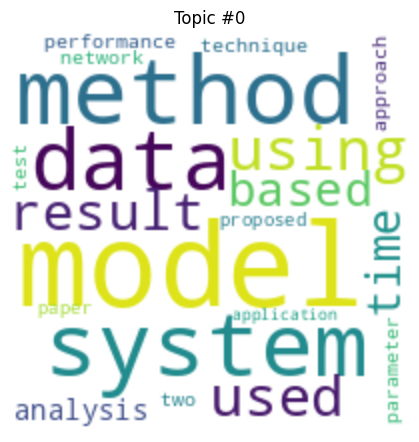

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


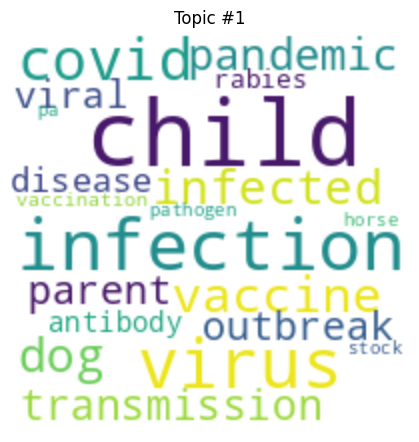

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


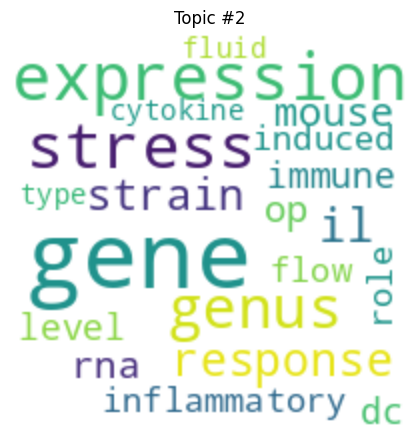

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


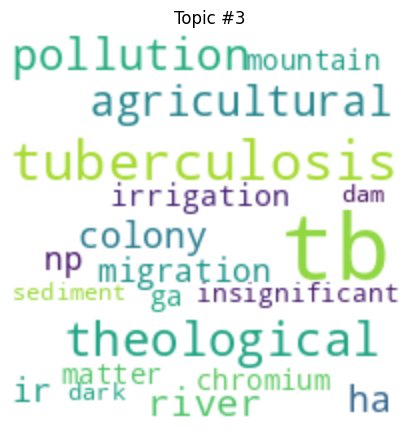

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


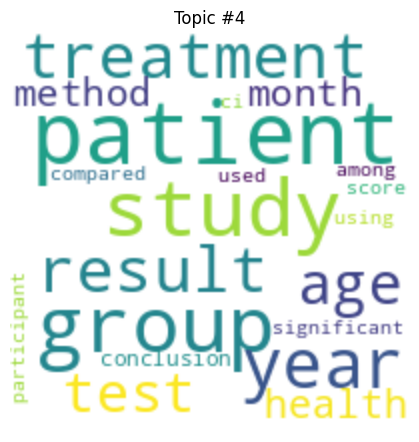

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


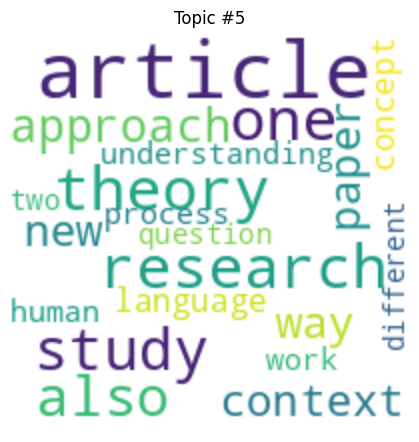

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


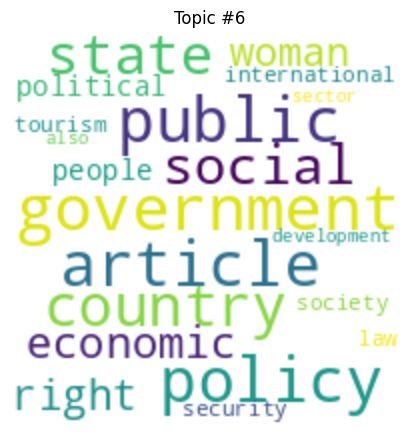

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


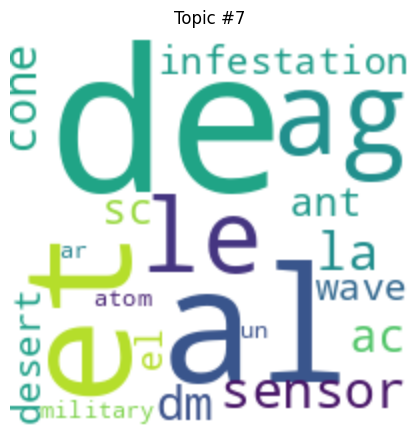

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


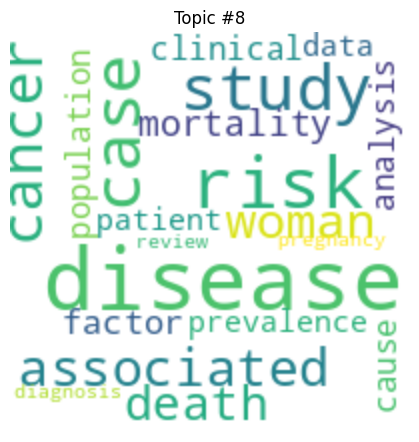

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


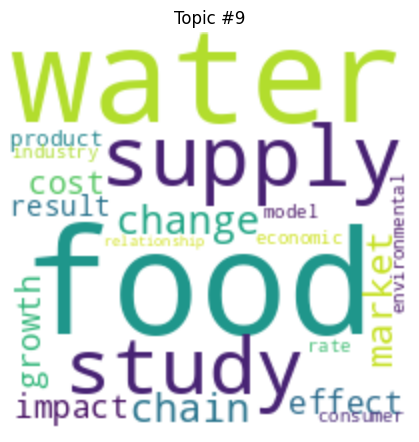

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


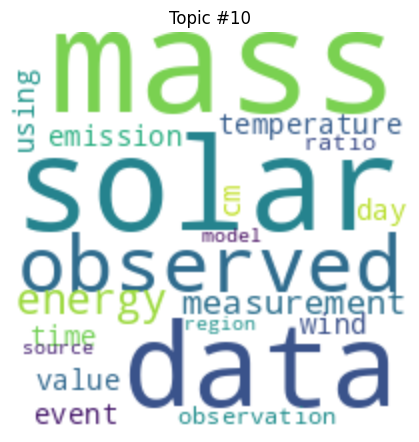

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


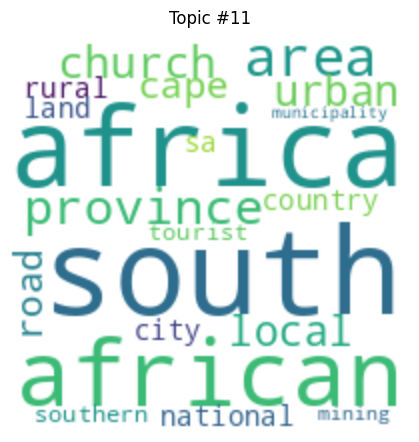

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


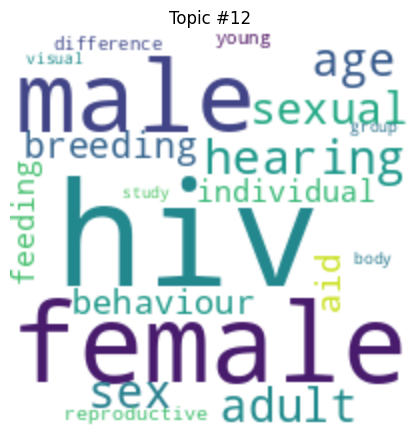

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


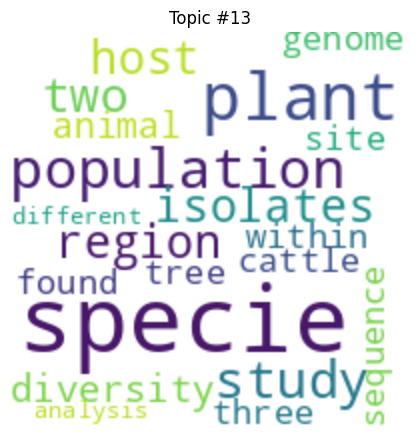

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


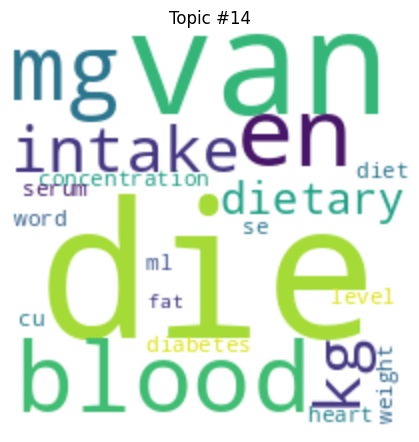

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


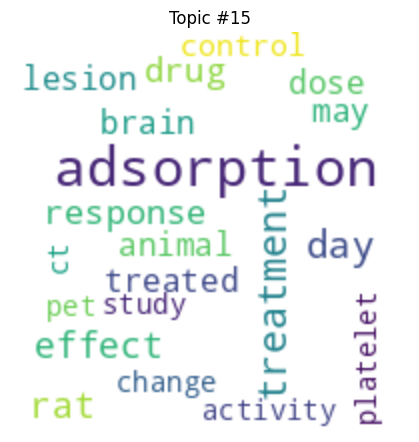

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


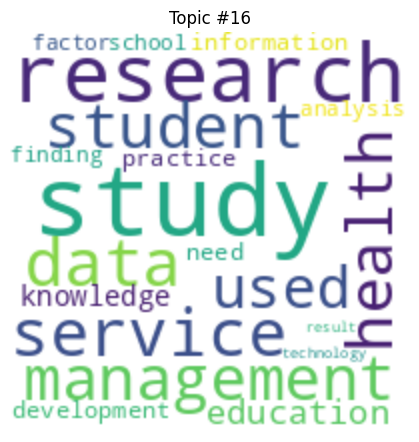

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


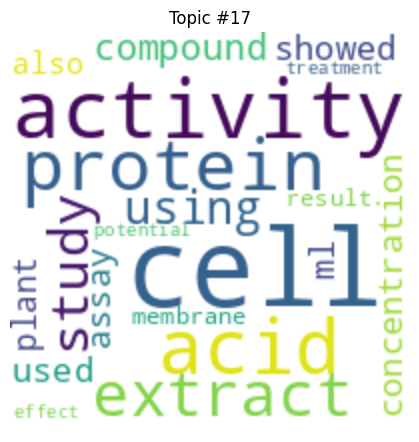

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


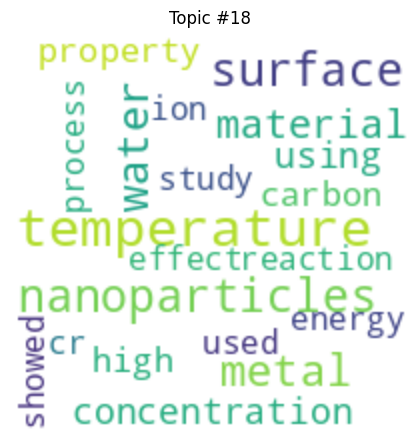

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


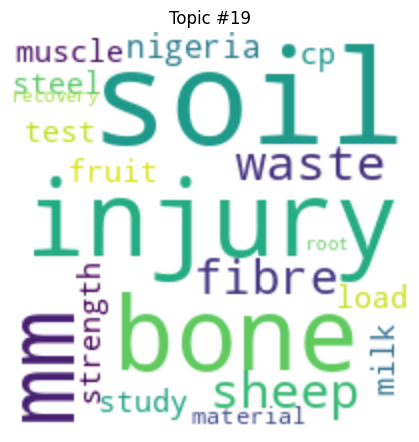

In [38]:
wordcloud_top_words(lda_model_tfidf, n_top_words=num_top_words)


2.3. Coherence Analysis

### Coherence Calculation For Each Model

The first section of the code creates a list of the top words for each topic. It does this by iterating over each topic in the LDA model and sorting the words in descending order of importance. It then selects the top "num_top_words" words for each topic and adds them to the list "topic_words_lda_tfidf".

The second section of the code calculates the coherence score for each topic. It does this by iterating over each list of top words for each topic and creating a CoherenceModel object. The "texts" argument in the CoherenceModel class is set to "topic_words_lda_tfidf", which is a list of preprocessed documents, with each document being represented as a list of words. The "dictionary" argument is set to the gensim dictionary object used to preprocess the documents. The "coherence" argument is set to 'c_v', which uses the c_v coherence measure to calculate the coherence score.

The coherence score for each topic is then appended to the list "coherence_scores_lda".

The code prints out the list of top words for each topic and the corresponding coherence scores.

Overall, the code is using LDA and the coherence model to extract and evaluate the coherence of the topics within the preprocessed documents. The coherence scores can help identify the most relevant topics and provide insights into the underlying structure and themes within the documents.


In [39]:
# Without lemmatizer

# Create a coherence model
coherence_model_lda_w = CoherenceModel(model=lda_model_tfidf_w, texts=document_tokens_w, dictionary=dictionary_w, coherence='c_v',processes=4)

# Calculate the coherence score for the model
coherence_lda_w = coherence_model_lda_w.get_coherence()

print('\nCoherence Score: ', coherence_lda_w)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.34285705880715966


In [40]:
# With lemmatizer

# Create a coherence model
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=document_tokens, dictionary=dictionary, coherence='c_v',processes=4)

# Calculate the coherence score for the model
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.49210425960934234


In [41]:
# Without lemmatizer

# Create an empty dictionary to store the data
data = {}

# Loop through the topics and get the top words
for i in range(n_components):
    top_words_lda = lda_model_tfidf_w.show_topic(i, topn=num_top_words)
    top_words = [word for word, _ in top_words_lda]
    
    # Add the topic and top words to the dictionary
    data[f"Topic {i}"] = top_words
    
# Create a dataframe from the dictionary and transpose it
df_top_words_lda_table = pd.DataFrame(data).T

# Rename the columns
df_top_words_lda_table.columns = [f"Top Word {i+1}" for i in range(num_top_words)]

# Display the dataframe
df_top_words_lda_table

# Export the dataframe to an Excel file in Colab
df_top_words_lda_table.to_excel("df_top_words_lda_table_w.xlsx", index=True)

# Download the Excel file to your local machine
from google.colab import files
files.download("df_top_words_lda_table_w.xlsx")



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
# With lemmatizer

# Create an empty dictionary to store the data
data = {}

# Loop through the topics and get the top words
for i in range(n_components):
    top_words_lda = lda_model_tfidf.show_topic(i, topn=10)
    top_words = [word for word, _ in top_words_lda]
    
    # Add the topic and top words to the dictionary
    data[f"Topic {i}"] = top_words
    
# Create a dataframe from the dictionary and transpose it
df_top_words_lda_table = pd.DataFrame(data).T

# Rename the columns
df_top_words_lda_table.columns = [f"Top Word {i+1}" for i in range(10)]

# Display the dataframe
df_top_words_lda_table

# Export the dataframe to an Excel file in Colab
df_top_words_lda_table.to_excel("df_top_words_lda_table.xlsx", index=True)

# Download the Excel file to your local machine
from google.colab import files
files.download("df_top_words_lda_table.xlsx")



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
# Without lemmatizer

# Compute the perplexity score
perplexity_score = lda_model_tfidf_w.log_perplexity(corpus)

print(f"Perplexity Score: {perplexity_score}")


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity Score: -12.03567693263449


In [44]:
# With lemmatizer

# Compute the perplexity score
perplexity_score = lda_model_tfidf.log_perplexity(corpus)

print(f"Perplexity Score: {perplexity_score}")


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity Score: -11.15898063877097


Average topic coherence is used to evaluate the overall model is to compute the average coherence score across all topics. This provides a single score that summarizes the quality of the model as a whole. 

The plot_coherence function plots the coherence of the model as a function of the number of topics

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


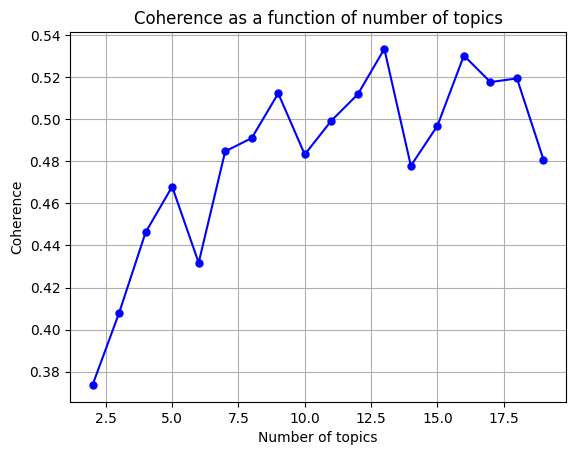

CPU times: user 1h 27min 51s, sys: 24.8 s, total: 1h 28min 16s
Wall time: 1h 29min 14s


In [ ]:
%%time
def plot_coherence(id_dict, corpus, texts, n_components):
    num_topics_range = range(2, n_components)
    coherences = []
    for num_topics in num_topics_range:
        lda_model = LdaModel(corpus=corpus, id2word=id_dict, num_topics=num_topics)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id_dict, coherence='c_v')
        coherences.append(coherence_model_lda.get_coherence())

    plt.plot(num_topics_range, coherences,color='blue', marker='o', markersize=5)
    plt.title('Coherence as a function of number of topics')
    plt.xlabel('Number of topics')
    plt.ylabel('Coherence')
    plt.grid()
    plt.show()

plot_coherence(dictionary, corpus, document_tokens, n_components)

4.2.pyLDAvis

In [45]:
import pyLDAvis.gensim


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
lda_prepared = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus,dictionary)
pyLDAvis.display(lda_prepared)
#pyLDAvis.show(lda_prepared)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
ERROR:concurrent.futures:exception calling callback for <Future at 0x7f111291b460 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'
"""

The above exception was the direct cause of the following except

BrokenProcessPool: ignored